## 1️⃣ Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2️⃣ Setup Library & Environment

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

print("Pandas version:", pd.__version__)

Pandas version: 2.2.2


## 3️⃣ Tentukan Path Folder Dataset di Google Drive

In [3]:
DATA_DIR = Path("/content/drive/MyDrive/PROYEK/Data_Bursa")

## 4️⃣ Load 7 File Excel (.xlsx)

In [4]:
files = list(DATA_DIR.glob("*.xlsx"))

print(f"Total files found: {len(files)}")
for f in files:
    print("-", f.name)

dfs = {}
for file in files:
    dfs[file.stem] = pd.read_excel(file)

print("\nDatasets loaded:")
print(list(dfs.keys()))

Total files found: 7
- R1.xlsx
- R7.xlsx
- R6.xlsx
- R5.xlsx
- R4.xlsx
- R3.xlsx
- R2.xlsx

Datasets loaded:
['R1', 'R7', 'R6', 'R5', 'R4', 'R3', 'R2']


## 5️⃣ EDA Awal — Struktur Dataset

In [5]:
for name, df in dfs.items():
    print("="*80)
    print(f"DATASET: {name}")
    print("="*80)
    print("Shape:", df.shape)
    print("\nData Types:")
    print(df.dtypes)

DATASET: R1
Shape: (958, 28)

Data Types:
No                                int64
Kode Saham                       object
Nama Perusahaan                  object
Remarks                          object
Sebelumnya                        int64
Open Price                        int64
Tanggal Perdagangan Terakhir     object
First Trade                       int64
Tertinggi                         int64
Terendah                          int64
Penutupan                         int64
Selisih                           int64
Volume                            int64
Nilai                             int64
Frekuensi                         int64
Index Individual                float64
Offer                             int64
Offer Volume                      int64
Bid                               int64
Bid Volume                        int64
Listed Shares                     int64
Tradeble Shares                   int64
Weight For Index                  int64
Foreign Sell                      int6

## 6️⃣ Missing Values Analysis

In [6]:
for name, df in dfs.items():
    print("="*80)
    print(f"MISSING VALUES: {name}")
    print("="*80)

    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)

    if missing.empty:
        print("No missing values detected.")
    else:
        print(missing)

MISSING VALUES: R1
No missing values detected.
MISSING VALUES: R7
No missing values detected.
MISSING VALUES: R6
No missing values detected.
MISSING VALUES: R5
No missing values detected.
MISSING VALUES: R4
No missing values detected.
MISSING VALUES: R3
No missing values detected.
MISSING VALUES: R2
No missing values detected.


## 7️⃣ Duplicate Rows Check

In [7]:
for name, df in dfs.items():
    dup_count = df.duplicated().sum()
    print(f"{name} → Duplicate rows: {dup_count}")

R1 → Duplicate rows: 0
R7 → Duplicate rows: 0
R6 → Duplicate rows: 0
R5 → Duplicate rows: 0
R4 → Duplicate rows: 0
R3 → Duplicate rows: 0
R2 → Duplicate rows: 0


## 8️⃣ Statistik Deskriptif

### Numerik

In [8]:
for name, df in dfs.items():
    print("="*80)
    print(f"DESCRIPTIVE STATS (NUMERIC): {name}")
    print("="*80)
    display(df.describe())

DESCRIPTIVE STATS (NUMERIC): R1


,No,Sebelumnya,Open Price,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,9.580000e+02,958.000000,958.000000,958.000000,9.580000e+02,958.000000,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,958.000000
mean,479.500000,1696.657620,985.554280,984.960334,1607.650313,1538.797495,1702.838205,6.180585,5.214459e+07,2.642707e+10,3551.931106,1257.955324,1541.390397,1.248687e+06,1565.146138,3.273306e+06,1.279806e+10,1.241090e+10,4.061242e+09,8.736362e+06,8.921329e+06,4.601112e+06,2.099372e+09,0.651357
std,276.695079,8629.510008,4043.439445,4042.393229,8686.677907,8410.407143,8614.914247,125.350809,3.175747e+08,1.405678e+11,12715.556228,7207.870220,8462.426919,9.546054e+06,8444.980681,2.047676e+07,4.544961e+10,4.513730e+10,2.947634e+10,8.670820e+07,8.093110e+07,4.495102e+07,1.713399e+10,4.835383
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1425.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.600000e+06,3.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,240.250000,129.000000,0.000000,0.000000,103.250000,100.000000,131.000000,-2.000000,1.436250e+05,1.080724e+08,88.250000,60.175000,88.250000,1.325000e+03,100.250000,1.925000e+03,1.459428e+09,1.360618e+09,2.366168e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,479.500000,328.000000,189.500000,190.000000,313.000000,298.000000,331.000000,0.000000,2.953550e+06,7.911334e+08,464.500000,143.500000,281.000000,3.110000e+04,307.000000,4.175000e+04,3.557516e+09,3.489338e+09,7.028331e+08,4.360000e+04,4.940000e+04,0.000000e+00,0.000000e+00,0.000000
75%,718.750000,1067.500000,635.000000,635.000000,1013.750000,988.750000,1047.500000,5.000000,1.982860e+07,6.382314e+09,2023.750000,438.100000,950.000000,2.584000e+05,993.750000,4.338000e+05,1.018925e+10,9.940009e+09,2.366833e+09,1.549175e+06,1.486925e+06,0.000000e+00,0.000000e+00,0.000000
max,958.000000,218500.000000,104000.000000,104000.000000,225000.000000,218100.000000,218100.000000,2375.000000,7.430491e+09,3.483460e+12,237048.000000,149195.100000,218525.000000,2.119220e+08,218100.000000,3.771343e+08,1.140573e+12,1.140573e+12,8.773290e+11,2.215624e+09,2.118996e+09,8.783775e+08,2.831554e+11,106.000000


DESCRIPTIVE STATS (NUMERIC): R7


,No,Sebelumnya,Open Price,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,9.580000e+02,958.000000,958.000000,958.000000,9.580000e+02,958.000000,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,958.000000
mean,479.500000,1696.657620,985.554280,984.960334,1607.650313,1538.797495,1702.838205,6.180585,5.214459e+07,2.642707e+10,3551.931106,1257.955324,1541.390397,1.248687e+06,1565.146138,3.273306e+06,1.279806e+10,1.241090e+10,4.061242e+09,8.736362e+06,8.921329e+06,4.601112e+06,2.099372e+09,0.651357
std,276.695079,8629.510008,4043.439445,4042.393229,8686.677907,8410.407143,8614.914247,125.350809,3.175747e+08,1.405678e+11,12715.556228,7207.870220,8462.426919,9.546054e+06,8444.980681,2.047676e+07,4.544961e+10,4.513730e+10,2.947634e+10,8.670820e+07,8.093110e+07,4.495102e+07,1.713399e+10,4.835383
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1425.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.600000e+06,3.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,240.250000,129.000000,0.000000,0.000000,103.250000,100.000000,131.000000,-2.000000,1.436250e+05,1.080724e+08,88.250000,60.175000,88.250000,1.325000e+03,100.250000,1.925000e+03,1.459428e+09,1.360618e+09,2.366168e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,479.500000,328.000000,189.500000,190.000000,313.000000,298.000000,331.000000,0.000000,2.953550e+06,7.911334e+08,464.500000,143.500000,281.000000,3.110000e+04,307.000000,4.175000e+04,3.557516e+09,3.489338e+09,7.028331e+08,4.360000e+04,4.940000e+04,0.000000e+00,0.000000e+00,0.000000
75%,718.750000,1067.500000,635.000000,635.000000,1013.750000,988.750000,1047.500000,5.000000,1.982860e+07,6.382314e+09,2023.750000,438.100000,950.000000,2.584000e+05,993.750000,4.338000e+05,1.018925e+10,9.940009e+09,2.366833e+09,1.549175e+06,1.486925e+06,0.000000e+00,0.000000e+00,0.000000
max,958.000000,218500.000000,104000.000000,104000.000000,225000.000000,218100.000000,218100.000000,2375.000000,7.430491e+09,3.483460e+12,237048.000000,149195.100000,218525.000000,2.119220e+08,218100.000000,3.771343e+08,1.140573e+12,1.140573e+12,8.773290e+11,2.215624e+09,2.118996e+09,8.783775e+08,2.831554e+11,106.000000


DESCRIPTIVE STATS (NUMERIC): R6


,No,Sebelumnya,Open Price,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,9.580000e+02,958.000000,958.000000,958.000000,9.580000e+02,958.000000,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,958.000000
mean,479.500000,1699.673278,1359.927975,1359.611691,1597.778706,1519.950939,1691.262004,-8.411273,7.285042e+07,4.040961e+10,5232.370564,1237.290919,1546.667015,7.659710e+05,1534.574113,4.637341e+06,1.280131e+10,1.241417e+10,4.061242e+09,1.172482e+07,1.144142e+07,2.097109e+06,1.292725e+09,0.614823
std,276.695079,8614.891172,8397.421038,8400.738725,8502.139832,8385.731960,8604.976461,126.007057,4.322124e+08,1.958184e+11,19302.094123,6919.791692,8440.371249,3.268382e+06,8392.677961,4.027867e+07,4.545208e+10,4.513981e+10,2.947634e+10,9.670925e+07,8.203684e+07,2.007957e+07,1.068386e+10,4.264611
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2375.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.600000e+06,3.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,240.250000,131.000000,0.000000,0.000000,105.250000,99.000000,130.000000,-9.750000,2.168250e+05,1.414902e+08,110.000000,60.025000,91.250000,1.000000e+03,99.000000,1.400000e+03,1.459428e+09,1.360618e+09,2.366168e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,479.500000,329.000000,214.000000,214.000000,312.000000,290.000000,326.000000,0.000000,4.477150e+06,1.187242e+09,616.500000,142.400000,289.000000,2.710000e+04,292.000000,2.955000e+04,3.557516e+09,3.489338e+09,7.028331e+08,1.135500e+05,8.405000e+04,0.000000e+00,0.000000e+00,0.000000
75%,718.750000,1038.750000,673.750000,673.750000,971.250000,900.000000,1041.250000,2.000000,2.774685e+07,9.734525e+09,2881.500000,437.550000,928.750000,2.450750e+05,913.750000,3.389000e+05,1.022412e+10,9.993896e+09,2.366833e+09,2.746100e+06,2.663850e+06,0.000000e+00,0.000000e+00,0.000000
max,958.000000,218100.000000,218550.000000,218700.000000,219000.000000,218525.000000,218525.000000,1150.000000,9.759300e+09,4.309499e+12,368352.000000,140361.200000,218525.000000,4.746290e+07,217850.000000,7.875331e+08,1.140573e+12,1.140573e+12,8.773290e+11,2.388075e+09,1.568620e+09,4.340325e+08,2.023085e+11,88.000000


DESCRIPTIVE STATS (NUMERIC): R5


,No,Sebelumnya,Open Price,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,9.580000e+02,958.000000,958.000000,958.000000,9.580000e+02,958.000000,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,958.000000
mean,479.500000,1691.262004,934.347599,934.808977,1584.458246,1521.535491,1695.369520,4.107516,5.620440e+07,3.209751e+10,3920.807933,1249.487474,1540.266180,1.055862e+06,1499.043841,5.534064e+06,1.280578e+10,1.241865e+10,4.061242e+09,9.293487e+06,9.666238e+06,6.982750e+06,2.845228e+09,0.713987
std,276.695079,8604.976461,3963.154157,3963.364188,8482.981603,8383.564662,8613.301439,175.000809,3.795314e+08,1.722443e+11,15529.248530,7167.112398,8447.915203,8.410552e+06,8394.349207,5.037582e+07,4.545395e+10,4.514174e+10,2.947634e+10,7.276510e+07,7.502196e+07,1.225937e+08,3.362901e+10,5.369097
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4000.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.600000e+06,3.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,240.250000,130.000000,0.000000,0.000000,102.250000,97.000000,132.250000,-4.000000,1.514000e+05,1.076498e+08,80.000000,59.550000,92.000000,1.100000e+03,93.000000,1.325000e+03,1.459428e+09,1.360618e+09,2.366168e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,479.500000,326.000000,180.500000,181.000000,306.000000,288.000000,326.000000,0.000000,3.054500e+06,8.675154e+08,490.000000,141.150000,284.000000,3.185000e+04,281.000000,3.645000e+04,3.557516e+09,3.489338e+09,7.028331e+08,3.300000e+04,5.335000e+04,0.000000e+00,0.000000e+00,0.000000
75%,718.750000,1041.250000,593.750000,593.750000,998.750000,957.500000,1035.000000,5.000000,2.022802e+07,6.322015e+09,2164.750000,432.100000,951.250000,2.388000e+05,915.000000,2.830000e+05,1.022412e+10,9.993896e+09,2.366833e+09,1.518300e+06,1.470100e+06,0.000000e+00,0.000000e+00,0.000000
max,958.000000,218525.000000,103425.000000,103425.000000,218525.000000,218350.000000,218375.000000,1575.000000,9.716508e+09,4.047392e+12,349150.000000,150503.900000,218475.000000,2.321506e+08,218350.000000,1.369913e+09,1.140573e+12,1.140573e+12,8.773290e+11,1.368514e+09,1.572163e+09,3.138241e+09,8.899422e+11,125.000000


DESCRIPTIVE STATS (NUMERIC): R4


,No,Sebelumnya,Open Price,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,9.580000e+02,958.000000,958.000000,958.000000,9.580000e+02,958.000000,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,958.000000
mean,479.500000,1691.262004,934.347599,934.808977,1584.458246,1521.535491,1695.369520,4.107516,5.620440e+07,3.209751e+10,3920.807933,1249.487474,1540.266180,1.055862e+06,1499.043841,5.534064e+06,1.280578e+10,1.241865e+10,4.061242e+09,9.293487e+06,9.666238e+06,6.982750e+06,2.845228e+09,0.713987
std,276.695079,8604.976461,3963.154157,3963.364188,8482.981603,8383.564662,8613.301439,175.000809,3.795314e+08,1.722443e+11,15529.248530,7167.112398,8447.915203,8.410552e+06,8394.349207,5.037582e+07,4.545395e+10,4.514174e+10,2.947634e+10,7.276510e+07,7.502196e+07,1.225937e+08,3.362901e+10,5.369097
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4000.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.600000e+06,3.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,240.250000,130.000000,0.000000,0.000000,102.250000,97.000000,132.250000,-4.000000,1.514000e+05,1.076498e+08,80.000000,59.550000,92.000000,1.100000e+03,93.000000,1.325000e+03,1.459428e+09,1.360618e+09,2.366168e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,479.500000,326.000000,180.500000,181.000000,306.000000,288.000000,326.000000,0.000000,3.054500e+06,8.675154e+08,490.000000,141.150000,284.000000,3.185000e+04,281.000000,3.645000e+04,3.557516e+09,3.489338e+09,7.028331e+08,3.300000e+04,5.335000e+04,0.000000e+00,0.000000e+00,0.000000
75%,718.750000,1041.250000,593.750000,593.750000,998.750000,957.500000,1035.000000,5.000000,2.022802e+07,6.322015e+09,2164.750000,432.100000,951.250000,2.388000e+05,915.000000,2.830000e+05,1.022412e+10,9.993896e+09,2.366833e+09,1.518300e+06,1.470100e+06,0.000000e+00,0.000000e+00,0.000000
max,958.000000,218525.000000,103425.000000,103425.000000,218525.000000,218350.000000,218375.000000,1575.000000,9.716508e+09,4.047392e+12,349150.000000,150503.900000,218475.000000,2.321506e+08,218350.000000,1.369913e+09,1.140573e+12,1.140573e+12,8.773290e+11,1.368514e+09,1.572163e+09,3.138241e+09,8.899422e+11,125.000000


DESCRIPTIVE STATS (NUMERIC): R3


,No,Sebelumnya,Open Price,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,9.580000e+02,958.000000,958.000000,958.000000,9.580000e+02,958.000000,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,958.000000
mean,479.500000,1709.923800,1012.806889,1013.155532,1606.355950,1539.871608,1732.736952,22.813152,4.664917e+07,2.700942e+10,3443.056367,1283.101148,1540.874739,1.950438e+06,1575.096033,4.690921e+06,1.281188e+10,1.242474e+10,4.061242e+09,8.259847e+06,6.969479e+06,2.383484e+06,2.309037e+09,0.694154
std,276.695079,8453.493164,4189.192603,4201.034191,8581.539554,8281.327068,8706.660282,321.552285,2.530784e+08,1.185846e+11,10081.797957,7433.834037,8581.112326,2.198226e+07,8535.291150,3.686590e+07,4.545839e+10,4.514626e+10,2.947634e+10,7.837292e+07,6.751505e+07,2.689919e+07,1.996150e+10,5.748780
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1100.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.600000e+06,3.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,240.250000,133.000000,0.000000,0.000000,102.000000,98.000000,133.000000,-4.000000,1.556250e+05,1.003665e+08,88.500000,62.050000,86.500000,1.100000e+03,99.250000,1.100000e+03,1.459428e+09,1.360618e+09,2.366168e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,479.500000,326.000000,190.500000,189.500000,311.000000,288.000000,327.000000,0.000000,2.980950e+06,9.921202e+08,533.500000,146.550000,273.000000,3.410000e+04,301.000000,4.285000e+04,3.557516e+09,3.489338e+09,7.028331e+08,5.710000e+04,1.500000e+04,0.000000e+00,0.000000e+00,0.000000
75%,718.750000,1056.250000,633.750000,633.750000,995.000000,942.500000,1050.000000,5.000000,1.995755e+07,6.106000e+09,2078.250000,449.375000,935.000000,2.144500e+05,986.250000,3.763750e+05,1.022412e+10,9.993896e+09,2.366833e+09,1.663425e+06,1.140025e+06,0.000000e+00,0.000000e+00,0.000000
max,958.000000,210200.000000,108050.000000,108500.000000,218500.000000,210500.000000,218000.000000,7800.000000,5.561513e+09,1.721560e+12,172988.000000,155084.400000,220000.000000,5.257865e+08,218000.000000,7.352712e+08,1.140573e+12,1.140573e+12,8.773290e+11,2.100585e+09,1.971826e+09,7.645980e+08,3.433804e+11,160.000000


DESCRIPTIVE STATS (NUMERIC): R2


,No,Sebelumnya,Open Price,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,9.580000e+02,9.580000e+02,958.000000,958.000000,958.000000,9.580000e+02,958.000000,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02,958.000000
mean,479.500000,1709.923800,1012.806889,1013.155532,1606.355950,1539.871608,1732.736952,22.813152,4.664917e+07,2.700942e+10,3443.056367,1283.101148,1540.874739,1.950438e+06,1575.096033,4.690921e+06,1.281188e+10,1.242474e+10,4.061242e+09,8.259847e+06,6.969479e+06,2.383484e+06,2.309037e+09,0.694154
std,276.695079,8453.493164,4189.192603,4201.034191,8581.539554,8281.327068,8706.660282,321.552285,2.530784e+08,1.185846e+11,10081.797957,7433.834037,8581.112326,2.198226e+07,8535.291150,3.686590e+07,4.545839e+10,4.514626e+10,2.947634e+10,7.837292e+07,6.751505e+07,2.689919e+07,1.996150e+10,5.748780
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1100.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,3.600000e+06,3.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,240.250000,133.000000,0.000000,0.000000,102.000000,98.000000,133.000000,-4.000000,1.556250e+05,1.003665e+08,88.500000,62.050000,86.500000,1.100000e+03,99.250000,1.100000e+03,1.459428e+09,1.360618e+09,2.366168e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,479.500000,326.000000,190.500000,189.500000,311.000000,288.000000,327.000000,0.000000,2.980950e+06,9.921202e+08,533.500000,146.550000,273.000000,3.410000e+04,301.000000,4.285000e+04,3.557516e+09,3.489338e+09,7.028331e+08,5.710000e+04,1.500000e+04,0.000000e+00,0.000000e+00,0.000000
75%,718.750000,1056.250000,633.750000,633.750000,995.000000,942.500000,1050.000000,5.000000,1.995755e+07,6.106000e+09,2078.250000,449.375000,935.000000,2.144500e+05,986.250000,3.763750e+05,1.022412e+10,9.993896e+09,2.366833e+09,1.663425e+06,1.140025e+06,0.000000e+00,0.000000e+00,0.000000
max,958.000000,210200.000000,108050.000000,108500.000000,218500.000000,210500.000000,218000.000000,7800.000000,5.561513e+09,1.721560e+12,172988.000000,155084.400000,220000.000000,5.257865e+08,218000.000000,7.352712e+08,1.140573e+12,1.140573e+12,8.773290e+11,2.100585e+09,1.971826e+09,7.645980e+08,3.433804e+11,160.000000


### Kategorikal

In [9]:
for name, df in dfs.items():
    print("="*80)
    print(f"CATEGORICAL SUMMARY: {name}")
    print("="*80)
    display(df.describe(include="object"))

CATEGORICAL SUMMARY: R1


,Kode Saham,Nama Perusahaan,Remarks,Tanggal Perdagangan Terakhir
count,958,958,958,958
unique,958,958,600,1
top,ZYRX,Zyrexindo Mandiri Buana Tbk.,--UO2130000000H111------------,09 Jan 2026
freq,1,1,18,958


CATEGORICAL SUMMARY: R7


,Kode Saham,Nama Perusahaan,Remarks,Tanggal Perdagangan Terakhir
count,958,958,958,958
unique,958,958,600,1
top,ZYRX,Zyrexindo Mandiri Buana Tbk.,--UO2130000000H111------------,09 Jan 2026
freq,1,1,18,958


CATEGORICAL SUMMARY: R6


,Kode Saham,Nama Perusahaan,Remarks,Tanggal Perdagangan Terakhir
count,958,958,958,958
unique,958,958,598,1
top,ZYRX,Zyrexindo Mandiri Buana Tbk.,--UO2130000000H111------------,12 Jan 2026
freq,1,1,19,958


CATEGORICAL SUMMARY: R5


,Kode Saham,Nama Perusahaan,Remarks,Tanggal Perdagangan Terakhir
count,958,958,958,958
unique,958,958,600,1
top,ZYRX,Zyrexindo Mandiri Buana Tbk.,--UO2130000000H111------------,13 Jan 2026
freq,1,1,19,958


CATEGORICAL SUMMARY: R4


,Kode Saham,Nama Perusahaan,Remarks,Tanggal Perdagangan Terakhir
count,958,958,958,958
unique,958,958,600,1
top,ZYRX,Zyrexindo Mandiri Buana Tbk.,--UO2130000000H111------------,13 Jan 2026
freq,1,1,19,958


CATEGORICAL SUMMARY: R3


,Kode Saham,Nama Perusahaan,Remarks,Tanggal Perdagangan Terakhir
count,958,958,958,958
unique,958,958,600,1
top,ZYRX,Zyrexindo Mandiri Buana Tbk.,--UO2130000000H111------------,15 Jan 2026
freq,1,1,19,958


CATEGORICAL SUMMARY: R2


,Kode Saham,Nama Perusahaan,Remarks,Tanggal Perdagangan Terakhir
count,958,958,958,958
unique,958,958,600,1
top,ZYRX,Zyrexindo Mandiri Buana Tbk.,--UO2130000000H111------------,15 Jan 2026
freq,1,1,19,958


## 9️⃣ Data Preview (Sanity Check)

In [10]:
for name, df in dfs.items():
    print("="*80)
    print(f"HEAD: {name}")
    print("="*80)
    display(df.head())

HEAD: R1


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1SD0F10000A121------------,7400,7400,09 Jan 2026,7400,7400,7225,7250,-150,7228400,52626590000,5453,130.6,7250,31000,7225,216000,7786891760,7786891760,1464714340,1203500,298900,605,4172077,5
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000000D232------------,7925,7925,09 Jan 2026,7900,8075,7850,7900,-25,1335000,10637900000,1538,641.8,7900,31800,7875,2600,1924688333,1924688333,390711732,403400,754400,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,53,0,09 Jan 2026,0,53,52,53,0,2609700,136782200,193,117.1,53,1205800,52,1018000,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,3710,0,09 Jan 2026,0,3710,3710,3710,0,2400,8904000,9,847.0,4000,2000,3710,4500,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2820,2820,09 Jan 2026,2820,2830,2810,2820,0,553100,1559927000,354,75.2,2830,78900,2820,9100,2753165000,2753165000,414626649,46200,2200,0,0,0


HEAD: R7


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1SD0F10000A121------------,7400,7400,09 Jan 2026,7400,7400,7225,7250,-150,7228400,52626590000,5453,130.6,7250,31000,7225,216000,7786891760,7786891760,1464714340,1203500,298900,605,4172077,5
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000000D232------------,7925,7925,09 Jan 2026,7900,8075,7850,7900,-25,1335000,10637900000,1538,641.8,7900,31800,7875,2600,1924688333,1924688333,390711732,403400,754400,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,53,0,09 Jan 2026,0,53,52,53,0,2609700,136782200,193,117.1,53,1205800,52,1018000,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,3710,0,09 Jan 2026,0,3710,3710,3710,0,2400,8904000,9,847.0,4000,2000,3710,4500,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2820,2820,09 Jan 2026,2820,2830,2810,2820,0,553100,1559927000,354,75.2,2830,78900,2820,9100,2753165000,2753165000,414626649,46200,2200,0,0,0


HEAD: R6


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1SD0F10000A121------------,7250,7250,12 Jan 2026,7275,7300,7100,7150,-100,12933000,93153247500,8534,128.8,7175,24300,7150,18200,7786891760,7786891760,1464714340,1875400,2173200,41646,301777300,3
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000000D232------------,7900,7900,12 Jan 2026,7900,7900,7700,7700,-200,849500,6600632500,1035,625.5,7750,21700,7700,7500,1924688333,1924688333,390711732,189000,394000,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,53,0,12 Jan 2026,0,55,53,55,2,5522100,298971600,268,121.5,55,719100,54,1428800,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,3710,0,12 Jan 2026,0,4080,4080,4080,370,4000,16320000,21,931.5,4080,400,0,0,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2820,2830,12 Jan 2026,2840,2970,2830,2930,110,2587300,7553525000,1473,78.1,2940,55000,2930,10300,2753165000,2753165000,414626649,503000,354700,0,0,0


HEAD: R5


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1SD0F10000A121------------,7150,7200,13 Jan 2026,7200,7500,7200,7450,300,17970700,133032007500,10584,134.2,7450,155200,7425,36200,7786891760,7786891760,1464714340,1696600,4522500,622,3632429,5
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000000D232------------,7700,7725,13 Jan 2026,7750,7825,7700,7725,25,436200,3386057500,552,627.6,7750,500,7725,42600,1924688333,1924688333,390711732,161400,176400,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,55,0,13 Jan 2026,0,60,58,60,5,14119300,838986600,576,132.6,60,47900,59,64800,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,4080,0,13 Jan 2026,0,4080,4080,4080,0,200,816000,2,931.5,4080,1900,0,0,620806680,620806680,81325675,0,0,50,204000,1
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2930,2940,13 Jan 2026,2940,2940,2900,2910,-20,1164700,3398470000,623,77.6,2920,2900,2910,15000,2753165000,2753165000,414626649,202200,29900,0,0,0


HEAD: R4


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1SD0F10000A121------------,7150,7200,13 Jan 2026,7200,7500,7200,7450,300,17970700,133032007500,10584,134.2,7450,155200,7425,36200,7786891760,7786891760,1464714340,1696600,4522500,622,3632429,5
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000000D232------------,7700,7725,13 Jan 2026,7750,7825,7700,7725,25,436200,3386057500,552,627.6,7750,500,7725,42600,1924688333,1924688333,390711732,161400,176400,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,55,0,13 Jan 2026,0,60,58,60,5,14119300,838986600,576,132.6,60,47900,59,64800,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,4080,0,13 Jan 2026,0,4080,4080,4080,0,200,816000,2,931.5,4080,1900,0,0,620806680,620806680,81325675,0,0,50,204000,1
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2930,2940,13 Jan 2026,2940,2940,2900,2910,-20,1164700,3398470000,623,77.6,2920,2900,2910,15000,2753165000,2753165000,414626649,202200,29900,0,0,0


HEAD: R3


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1SD0F10000A121------------,7450,7525,15 Jan 2026,7525,7600,7450,7500,50,9954100,74663292500,5083,135.1,7525,207000,7500,4200,7786891760,7786891760,1464714340,1539600,3714100,742,4908770,4
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000000D232------------,7775,7750,15 Jan 2026,7750,7775,7650,7750,-25,569700,4398170000,704,629.6,7750,36200,7700,13200,1924688333,1924688333,390711732,117900,224400,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,66,0,15 Jan 2026,0,72,72,72,6,7009600,504691200,395,159.1,0,0,72,7213100,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,4080,0,15 Jan 2026,0,0,0,4080,0,0,0,0,931.5,4080,7100,0,0,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2980,3000,15 Jan 2026,3000,3080,2990,3030,50,1967900,5963478000,1081,80.8,3040,79600,3030,46200,2753165000,2753165000,414626649,178400,47200,0,0,0


HEAD: R2


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1SD0F10000A121------------,7450,7525,15 Jan 2026,7525,7600,7450,7500,50,9954100,74663292500,5083,135.1,7525,207000,7500,4200,7786891760,7786891760,1464714340,1539600,3714100,742,4908770,4
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000000D232------------,7775,7750,15 Jan 2026,7750,7775,7650,7750,-25,569700,4398170000,704,629.6,7750,36200,7700,13200,1924688333,1924688333,390711732,117900,224400,0,0,0
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,66,0,15 Jan 2026,0,72,72,72,6,7009600,504691200,395,159.1,0,0,72,7213100,3935892857,3935892857,1298844643,0,0,0,0,0
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,4080,0,15 Jan 2026,0,0,0,4080,0,0,0,0,931.5,4080,7100,0,0,620806680,620806680,81325675,0,0,0,0,0
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2980,3000,15 Jan 2026,3000,3080,2990,3030,50,1967900,5963478000,1081,80.8,3040,79600,3030,46200,2753165000,2753165000,414626649,178400,47200,0,0,0


## 1️⃣ Gabungkan 7 Dataset (Append + Time Index)

In [11]:
import pandas as pd
import numpy as np

# Pastikan dfs sudah tersedia dari tahap sebelumnya
# dfs = {"R1": df1, "R2": df2, ..., "R7": df7}

df_all = []

for name, df in dfs.items():
    temp = df.copy()
    temp["source"] = name   # optional: jejak asal file
    df_all.append(temp)

df = pd.concat(df_all, ignore_index=True)

print("Final shape:", df.shape)
df.head()

Final shape: (6706, 29)


,No,Kode Saham,Nama Perusahaan,Remarks,Sebelumnya,Open Price,Tanggal Perdagangan Terakhir,First Trade,Tertinggi,Terendah,Penutupan,Selisih,Volume,Nilai,Frekuensi,Index Individual,Offer,Offer Volume,Bid,Bid Volume,Listed Shares,Tradeble Shares,Weight For Index,Foreign Sell,Foreign Buy,Non Regular Volume,Non Regular Value,Non Regular Frequency,source
0,1,AADI,Adaro Andalan Indonesia Tbk.,--MO1SD0F10000A121------------,7400,7400,09 Jan 2026,7400,7400,7225,7250,-150,7228400,52626590000,5453,130.6,7250,31000,7225,216000,7786891760,7786891760,1464714340,1203500,298900,605,4172077,5,R1
1,2,AALI,Astra Agro Lestari Tbk.,--MO113E000000D232------------,7925,7925,09 Jan 2026,7900,8075,7850,7900,-25,1335000,10637900000,1538,641.8,7900,31800,7875,2600,1924688333,1924688333,390711732,403400,754400,0,0,0,R1
2,3,ABBA,Mahaka Media Tbk.,--U-4100000000E614-E---------X,53,0,09 Jan 2026,0,53,52,53,0,2609700,136782200,193,117.1,53,1205800,52,1018000,3935892857,3935892857,1298844643,0,0,0,0,0,R1
3,4,ABDA,Asuransi Bina Dana Arta Tbk.,--U-4105000000G412-----------X,3710,0,09 Jan 2026,0,3710,3710,3710,0,2400,8904000,9,847.0,4000,2000,3710,4500,620806680,620806680,81325675,0,0,0,0,0,R1
4,5,ABMM,ABM Investama Tbk.,--MO1135000000A121------------,2820,2820,09 Jan 2026,2820,2830,2810,2820,0,553100,1559927000,354,75.2,2830,78900,2820,9100,2753165000,2753165000,414626649,46200,2200,0,0,0,R1


## 2️⃣ Parsing & Standarisasi Kolom Waktu

In [13]:
df["Tanggal Perdagangan Terakhir"] = pd.to_datetime(
    df["Tanggal Perdagangan Terakhir"],
    format="%d %b %Y"
)

df = df.sort_values(
    ["Kode Saham", "Tanggal Perdagangan Terakhir"]
).reset_index(drop=True)

## 3️⃣ Drop Kolom Redundan / Non-Analitis

In [14]:
DROP_COLS = ["No", "Remarks"]

df = df.drop(columns=DROP_COLS)

## 4️⃣ Feature Engineering — Core Financial Features

### 4.1 Return & Price Dynamics

In [15]:
df["return_close"] = (
    df.groupby("Kode Saham")["Penutupan"]
      .pct_change()
)

df["range_harian"] = df["Tertinggi"] - df["Terendah"]

df["gap_open"] = df["Open Price"] - df["Sebelumnya"]

### 4.2 Volume & Liquidity Signals

In [17]:
df["log_volume"] = np.log1p(df["Volume"])
df["log_value"]  = np.log1p(df["Nilai"])

df["volume_change"] = (
    df.groupby("Kode Saham")["Volume"]
      .pct_change()
)

### 4.3 Foreign Flow (AKUMULASI BANDAR)

In [18]:
df["foreign_net"] = df["Foreign Buy"] - df["Foreign Sell"]

df["foreign_ratio"] = np.where(
    df["Volume"] > 0,
    df["foreign_net"] / df["Volume"],
    0
)

### 4.4 Order Book Pressure (Bid–Offer Imbalance)

In [22]:
df["bid_offer_imbalance"] = np.where(
    (df["Bid Volume"] + df["Offer Volume"]) > 0,
    (df["Bid Volume"] - df["Offer Volume"]) /
    (df["Bid Volume"] + df["Offer Volume"]),
    0
)


### 4.5 Volatility Proxy (Intraday)

In [23]:
df["volatility_proxy"] = np.where(
    df["Penutupan"] > 0,
    df["range_harian"] / df["Penutupan"],
    0
)

## 1️⃣ Pastikan Kolom Dasar Ada (Foreign & Volume)

In [30]:
REQUIRED_BASE_COLS = [
    "Foreign Buy", "Foreign Sell", "Volume"
]

missing_base = [c for c in REQUIRED_BASE_COLS if c not in df.columns]
missing_base

[]

## 2️⃣ Buat Ulang Feature 4.3 (Jika Perlu)

In [31]:
if "foreign_net" not in df.columns:
    df["foreign_net"] = df["Foreign Buy"] - df["Foreign Sell"]

## 3️⃣ BUAT ULANG FEATURE 5.1 & 5.2 (FIX ERROR ANDA)

### ✅ 5.1 Foreign Net Rolling 3 Hari

In [32]:
if "foreign_net_3d" not in df.columns:
    df["foreign_net_3d"] = (
        df.groupby("Kode Saham")["foreign_net"]
          .rolling(window=3, min_periods=1)
          .sum()
          .reset_index(level=0, drop=True)
    )

### ✅ 5.2 Volume MA & Spike

In [33]:
if "volume_ma3" not in df.columns:
    df["volume_ma3"] = (
        df.groupby("Kode Saham")["Volume"]
          .rolling(window=3, min_periods=1)
          .mean()
          .reset_index(level=0, drop=True)
    )

if "volume_spike" not in df.columns:
    df["volume_spike"] = (df["Volume"] > 1.5 * df["volume_ma3"]).astype(int)

## 4️⃣ SEKARANG AMAN UNTUK DITAMPILKAN

### 4.1–4.5 & 5.1–5.2 Display (FIXED)

In [34]:
FEATURE_COLS = [
    "return_close",
    "range_harian",
    "gap_open",
    "log_volume",
    "log_value",
    "volume_change",
    "foreign_net",
    "foreign_ratio",
    "bid_offer_imbalance",
    "volatility_proxy",
    "foreign_net_3d",
    "volume_ma3",
    "volume_spike"
]

## 5️⃣ Preview TANPA ERROR (Robust)

In [36]:
sample_ticker = (
    df.groupby("Kode Saham").size()
      .sort_values(ascending=False)
      .index[0]
)

df_sample = (
    df[df["Kode Saham"] == sample_ticker]
    .sort_values("Tanggal Perdagangan Terakhir")
    [["Kode Saham", "Tanggal Perdagangan Terakhir"] + FEATURE_COLS]
)

df_sample

,Kode Saham,Tanggal Perdagangan Terakhir,return_close,range_harian,gap_open,log_volume,log_value,volume_change,foreign_net,foreign_ratio,bid_offer_imbalance,volatility_proxy,foreign_net_3d,volume_ma3,volume_spike
6699,ZYRX,2026-01-09,NaN,6,1,13.550243,18.657978,NaN,1300,0.001695,0.685000,0.036364,1300.0,7.670000e+05,0
6700,ZYRX,2026-01-09,0.000000,6,1,13.550243,18.657978,0.000000,1300,0.001695,0.685000,0.036364,2600.0,7.670000e+05,0
6701,ZYRX,2026-01-12,0.066667,15,3,17.533857,22.667297,52.710821,-509300,-0.012363,-0.373599,0.085227,-506700.0,1.424340e+07,1
6702,ZYRX,2026-01-13,-0.056818,12,0,15.463323,20.597288,-0.873882,218100,0.041978,0.885094,0.072289,-289900.0,1.571960e+07,0
6703,ZYRX,2026-01-13,0.000000,12,0,15.463323,20.597288,0.000000,218100,0.041978,0.885094,0.072289,-73100.0,1.719580e+07,0
6704,ZYRX,2026-01-15,0.006024,5,0,13.835020,18.946684,-0.803738,-43500,-0.042660,-0.867647,0.029940,392700.0,3.803633e+06,0
6705,ZYRX,2026-01-15,0.000000,5,0,13.835020,18.946684,0.000000,-43500,-0.042660,-0.867647,0.029940,131100.0,2.411667e+06,0


In [37]:
df[
    ["Kode Saham", "Tanggal Perdagangan Terakhir"] + FEATURE_COLS
].sample(20, random_state=42)

,Kode Saham,Tanggal Perdagangan Terakhir,return_close,range_harian,gap_open,log_volume,log_value,volume_change,foreign_net,foreign_ratio,bid_offer_imbalance,volatility_proxy,foreign_net_3d,volume_ma3,volume_spike
1188,BRPT,2026-01-15,0.007117,140,10,18.233822,26.174587,-0.452240,9102500,0.109727,0.348760,0.049470,59387500.0,1.286161e+08,0
5711,SOHO,2026-01-15,0.000000,800,740,14.876525,23.074227,0.000000,-19600,-0.006784,-0.304569,0.236686,-70200.0,2.469233e+06,0
247,AMFG,2026-01-12,-0.002695,60,0,10.165890,18.376917,0.468927,0,0.000000,-0.886364,0.016216,-10000.0,2.046667e+04,0
5776,SRAJ,2026-01-09,0.000000,175,-16500,10.146473,19.854252,0.000000,-8900,-0.349020,0.279693,0.010606,-17800.0,2.550000e+04,0
2836,IKBI,2026-01-09,0.000000,10,0,10.576458,16.832760,0.000000,0,0.000000,-0.963883,0.019048,0.0,3.920000e+04,0
3821,MAXI,2026-01-15,0.000000,1,-1,15.805752,19.780183,0.000000,0,0.000000,-0.134760,0.018868,-25900.0,6.239467e+06,0
334,APLI,2026-01-15,-0.025381,10,0,10.431200,16.378396,-0.609896,2800,0.082596,0.052632,0.026042,2800.0,6.923333e+04,0
1859,DKHH,2026-01-13,0.000000,37,16,19.892131,24.628324,0.000000,-5414800,-0.012432,-0.899067,0.373737,-14308600.0,4.819813e+08,0
4446,NINE,2026-01-09,0.000000,0,-272,16.772460,22.469554,0.000000,-10000000,-0.519772,1.000000,0.000000,-20000000.0,1.923920e+07,0
217,ALTO,2026-01-09,NaN,0,-18,0.000000,0.000000,NaN,0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0


In [38]:
set(FEATURE_COLS).issubset(df.columns)

True

## 2️⃣ Robust Normalization (ANTI OUTLIER)

In [39]:
def robust_zscore(series):
    median = series.median()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        return pd.Series(0, index=series.index)
    return (series - median) / iqr


## 3️⃣ Normalisasi Semua Sinyal

In [40]:
df["z_foreign_net_3d"] = robust_zscore(df["foreign_net_3d"])
df["z_foreign_ratio"] = robust_zscore(df["foreign_ratio"])
df["z_bid_offer"]     = robust_zscore(df["bid_offer_imbalance"])
df["z_return"]        = robust_zscore(df["return_close"].fillna(0))


## 5️⃣ Hitung Bandar Accumulation Score (HARIAN)

In [41]:
df["bandar_score"] = (
    0.35 * df["z_foreign_net_3d"] +
    0.20 * df["z_foreign_ratio"] +
    0.20 * df["z_bid_offer"] +
    0.15 * df["volume_spike"] +
    0.10 * df["z_return"]
)


## 6️⃣ Skor AKUMULASI 7 HARI (PER SAHAM)

In [42]:
score_7d = (
    df.groupby("Kode Saham")
      .agg(
          avg_bandar_score=("bandar_score", "mean"),
          sum_bandar_score=("bandar_score", "sum"),
          total_foreign_net=("foreign_net", "sum"),
          freq_volume_spike=("volume_spike", "sum"),
          avg_return=("return_close", "mean")
      )
      .sort_values("sum_bandar_score", ascending=False)
)


## 7️⃣ Top Saham Terindikasi Akumulasi Bandar

In [43]:
score_7d.head(15)

,avg_bandar_score,sum_bandar_score,total_foreign_net,freq_volume_spike,avg_return
Kode Saham,,,,,
GOTO,757.229086,5300.603601,1790845500,0,0.005013
MBMA,269.357311,1885.501175,755340300,2,0.035277
BIPI,173.635793,1215.450554,440138800,0,0.000000
CPRO,129.694492,907.861445,326016100,0,0.002447
MINA,68.972130,482.804910,159679000,0,0.007049
KPIG,65.955663,461.689644,174619000,1,0.030792
ADRO,61.435873,430.051109,151232400,0,0.010454
BUVA,54.489703,381.427919,172875800,0,0.019438
DEWA,53.587822,375.114757,232743600,1,-0.008082


## 8️⃣ Validasi Cepat (WAJIB)

### 8.1 Distribusi Skor

In [44]:
score_7d["sum_bandar_score"].describe()

,sum_bandar_score
count,958.000000
mean,-1.284827
std,410.372287
min,-10921.406379
25%,-2.489333
50%,0.000000
75%,3.313991
max,5300.603601


### 8.2 Cek Saham Skor Tinggi Tapi Return Negatif (DISTRIBUSI)

In [45]:
score_7d[
    (score_7d["sum_bandar_score"] > score_7d["sum_bandar_score"].quantile(0.9)) &
    (score_7d["avg_return"] < 0)
]

,avg_bandar_score,sum_bandar_score,total_foreign_net,freq_volume_spike,avg_return
Kode Saham,,,,,
DEWA,53.587822,375.114757,232743600,1,-0.008082
KIJA,44.369006,310.583039,70693400,0,-0.022406
DADA,39.499657,276.497598,99715000,0,-0.020657
ENRG,31.703874,221.927117,76772000,1,-0.013074
CDIA,30.558826,213.911783,99423900,1,-0.010285
MEDC,24.835250,173.846750,63352900,1,-0.002662
PPRE,18.068644,126.480505,36865700,0,-0.007155
BRPT,17.007020,119.049140,51796700,1,-0.014693
NICL,14.543387,101.803708,33769900,1,-0.015490


## 9️⃣ Dataset Final untuk Portofolio

In [46]:
score_7d.reset_index().to_csv(
    "bandar_accumulation_score_7d.csv",
    index=False
)

## 1️⃣ Desain Eksperimen (WAJIB DIPAHAMI)

## 2️⃣ Buat Target Return H+1 & H+3

In [47]:
# pastikan data sudah terurut
df = df.sort_values(
    ["Kode Saham", "Tanggal Perdagangan Terakhir"]
).reset_index(drop=True)

# Return H+1
df["return_h1"] = (
    df.groupby("Kode Saham")["return_close"]
      .shift(-1)
)

# Return kumulatif H+3
df["return_h3"] = (
    df.groupby("Kode Saham")["return_close"]
      .shift(-1)
      .rolling(window=3)
      .sum()
      .reset_index(level=0, drop=True)
)

## 3️⃣ Definisikan Kelompok Sinyal Bandar

In [48]:
# threshold top 10%
threshold = df["bandar_score"].quantile(0.90)

df["bandar_group"] = np.where(
    df["bandar_score"] >= threshold,
    "High Bandar",
    "Others"
)

## 4️⃣ Perbandingan Return (CORE RESULT)

### 4.1 Return H+1

In [49]:
df.groupby("bandar_group")[["return_h1"]].mean()

,return_h1
bandar_group,
High Bandar,0.005018
Others,0.005168


### 4.2 Return H+3

In [50]:
df.groupby("bandar_group")[["return_h3"]].mean()

,return_h3
bandar_group,
High Bandar,0.018436
Others,0.016597


## 5️⃣ Effect Size (Lebih Penting dari Signifikansi)

In [51]:
effect_h1 = (
    df[df["bandar_group"] == "High Bandar"]["return_h1"].mean()
    - df[df["bandar_group"] == "Others"]["return_h1"].mean()
)

effect_h3 = (
    df[df["bandar_group"] == "High Bandar"]["return_h3"].mean()
    - df[df["bandar_group"] == "Others"]["return_h3"].mean()
)

effect_h1, effect_h3

(np.float64(-0.00015052122335347702), np.float64(0.0018387711005846998))

## 6️⃣ Analisis Berbasis Quantile (LEBIH KUAT)

In [52]:
df["bandar_quantile"] = pd.qcut(
    df["bandar_score"],
    q=5,
    labels=["Q1 (Low)", "Q2", "Q3", "Q4", "Q5 (High)"]
)

df.groupby("bandar_quantile")[["return_h1", "return_h3"]].mean()

/tmp/ipython-input-2275666262.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("bandar_quantile")[["return_h1", "return_h3"]].mean()


,return_h1,return_h3
bandar_quantile,,
Q1 (Low),0.001705,0.008597
Q2,0.003674,0.008735
Q3,0.003585,0.009039
Q4,0.012593,0.040807
Q5 (High),0.003821,0.015638


## 7️⃣ Korelasi (Bukan Untuk Klaim Kuat)

In [53]:
df[["bandar_score", "return_h1", "return_h3"]].corr()

,bandar_score,return_h1,return_h3
bandar_score,1.000000,0.020174,0.045930
return_h1,0.020174,1.000000,0.584555
return_h3,0.045930,0.584555,1.000000


## 8️⃣ Validasi Negatif (ANTI-HALLUCINATION)

In [54]:
df.groupby("bandar_group")[
    ["return_h1", "return_h3"]
].quantile(0.25)

,return_h1,return_h3
bandar_group,,
High Bandar,0.0,-0.016454
Others,0.0,-0.015679


## 1️⃣ Line Chart — Return vs Quantile Bandar (CORE INSIGHT)

/tmp/ipython-input-2081305205.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("bandar_quantile")[["return_h1", "return_h3"]]


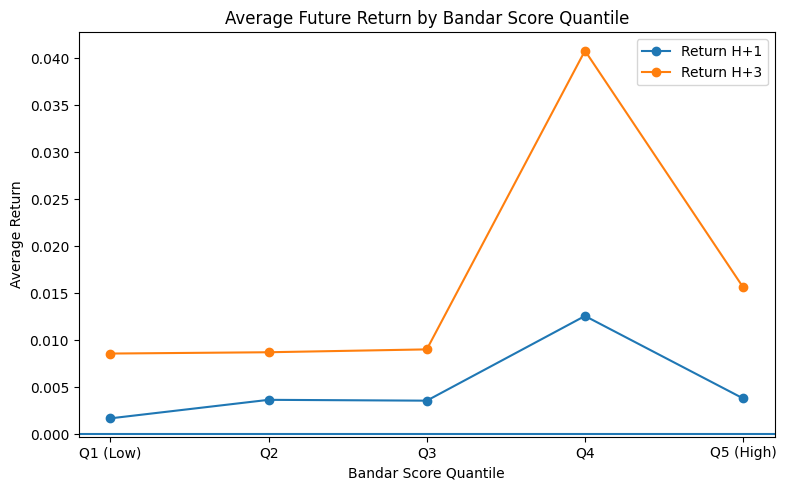

In [55]:
import matplotlib.pyplot as plt

quantile_mean = (
    df.groupby("bandar_quantile")[["return_h1", "return_h3"]]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8, 5))
plt.plot(quantile_mean["bandar_quantile"], quantile_mean["return_h1"], marker='o', label="Return H+1")
plt.plot(quantile_mean["bandar_quantile"], quantile_mean["return_h3"], marker='o', label="Return H+3")
plt.axhline(0)

plt.title("Average Future Return by Bandar Score Quantile")
plt.xlabel("Bandar Score Quantile")
plt.ylabel("Average Return")
plt.legend()
plt.tight_layout()
plt.show()

## 2️⃣ Bar Chart — Perbandingan High Bandar vs Others

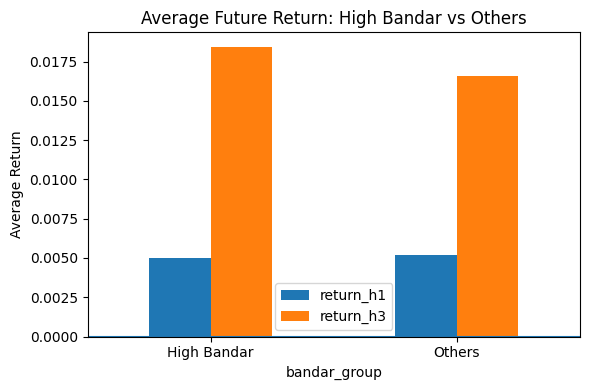

In [56]:
group_mean = df.groupby("bandar_group")[["return_h1", "return_h3"]].mean()

group_mean.plot(kind="bar", figsize=(6, 4))
plt.axhline(0)

plt.title("Average Future Return: High Bandar vs Others")
plt.ylabel("Average Return")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3️⃣ Histogram — Distribusi bandar_score (WHY SIGNAL IS RARE)

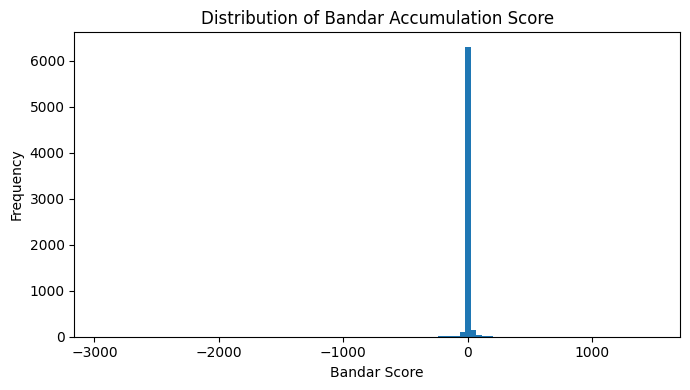

In [57]:
plt.figure(figsize=(7, 4))
plt.hist(df["bandar_score"], bins=100)
plt.title("Distribution of Bandar Accumulation Score")
plt.xlabel("Bandar Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## 4️⃣ Scatter Plot — Bandar Score vs Return H+3

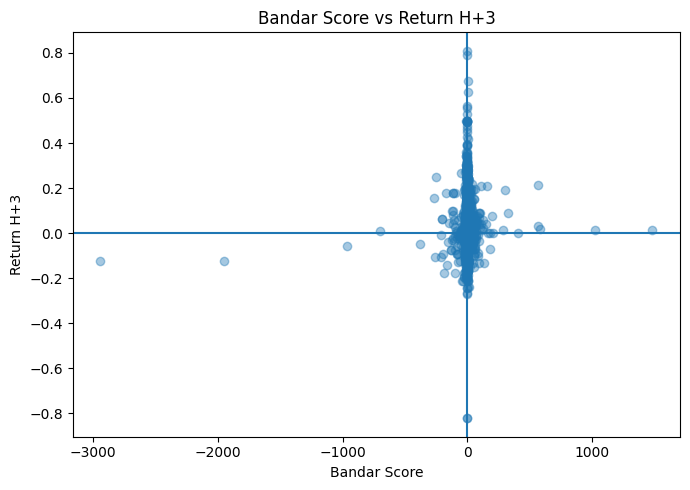

In [58]:
plt.figure(figsize=(7, 5))
plt.scatter(df["bandar_score"], df["return_h3"], alpha=0.4)
plt.axhline(0)
plt.axvline(0)

plt.title("Bandar Score vs Return H+3")
plt.xlabel("Bandar Score")
plt.ylabel("Return H+3")
plt.tight_layout()
plt.show()


## 5️⃣ Line Chart — Contoh 1 Saham (Storytelling Micro)

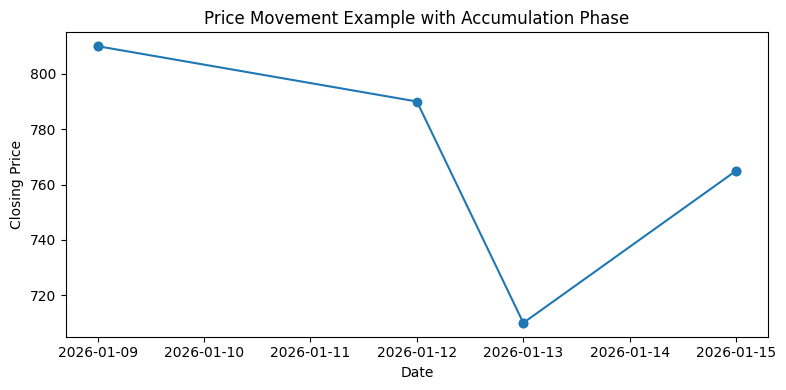

In [59]:
sample = (
    df[df["Kode Saham"] == "DEWA"]  # bisa ganti saham lain
    .sort_values("Tanggal Perdagangan Terakhir")
)

plt.figure(figsize=(8, 4))
plt.plot(sample["Tanggal Perdagangan Terakhir"], sample["Penutupan"], marker='o')
plt.title("Price Movement Example with Accumulation Phase")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.tight_layout()
plt.show()